## Positional Encoding and Sinusoids
* Author: Dewi Batista
* Revised by: Juan Diego Cardenas Cartagena

### Introduction

Although the discussion of sinusoids seems abstract in the lectures, the form
$$x(t) = A \sin(\omega_0 t + \phi)$$

has an interesting application in natural language processing. In the foundational work for the transformer architecture, "Attention Is All You Need" by A. Vaswani, et. al. (2017) [papers.nips.cc/...](https://papers.nips.cc/paper_files/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html), the researchers use sine and cosine functions to create a notion of position in the tokens from the text. One can find architectures that preserve and use the sequence in a signal, e.g., recurrent neural networks. However, transformers do not have a way to preserve the sequential nature of text signals, e.g., it is not the same as "I clean a window" as "a window clean I," grammar discussions aside, the first phrase refers to the subject "I" who makes an action "clean" on an object "a window." In contrast, the second sentence generates the notion of switching the subject and the object. The proposed solution to create a notion of sequence in the words is "positional encoding."

<center><img src="img/transformer.png" /></center>


### What is positional encoding?
To motivate the importance of positional encoding, consider the context of text generation models. Languages are rich in structure, with word (or token) order being fundamental to understanding the intended meaning of a piece of text. For example, consider the sentences "the chef cooked the meal for his critic" and "the critic cooked the chef for his meal". Both contain the same words in different orders but have clearly distinct meanings, highlighting the need for a notion of word (or token) order when interpreting text. Some architectures inherently account for order in a given input, such as Recurrent Neural Nets (RNNs) which do so by processing inputs sequentially. Transformer models, however, are position agnostic. That is, they have no such inherent mechanism, which leads to a natural question: given a transformer model that takes in a piece of text and produces a probability distribution over the set of all possible next words (or tokens), how should the model account for the order of the words (or tokens) in the input? The answer: positional encoding!

**Note**: In case it was misundersotod, the use of 'cooked' in "the critic cooked the chef for his meal" has an intended meaning synonymous with 'criticised' or 'ridiculed'. As in the chef cooked a meal which the critic ridiculed him for. It could also be interpreted as the critic literally cooking the chef alive but that interpretation is a little more cruel.

### Positional encoding and sinusoids
Positional encoding looks to provide to a transformer model the notion of order within a given input. This is done by systematically producing some vector for each input token, based on its position in the input, and adding it to that token's embedding vector. In the now famous paper 'Attention Is All You Need' sinusoid functions of varying frequencies were utilised to do just this. Given an input sequence of tokens, enumerate it in the usual way, indexing from 0 - for example, in the sequence "the chef cooked the meal for his critic" the index of 'critic' is 7 since it is the 8th word in the sequence and we index from 0. Then, given the index $k$ of a token, its corresponding position vector $P_k$ is produced as follows: for $i=0,...,d/2-1$, where $d$ is the dimension of the token embedding (and is even), elements $P_{k,2i}$ and $P_{k,2i+1}$ of $P_k$ are given by $\text{sin}\left(\frac{k}{n ^{2i / d}}\right)$ and $\text{cos}\left(\frac{k}{n ^{2i / d}}\right)$ respectively where $n$ is a fixed positive integer ($n=10000$ is taken in the paper). As such,
\begin{align*}
P_k
&=
\left[\text{sin}\left(\frac{k}{n ^{2 \cdot 0 / d}}\right), \text{cos}\left(\frac{k}{n ^{2 \cdot 0 / d}}\right), \text{sin}\left(\frac{k}{n ^{2 \cdot 1 / d}}\right), \text{cos}\left(\frac{k}{n ^{2 \cdot 1 / d}}\right), \dots,\text{sin}\left(\frac{k}{n ^{2 \cdot (d/2 - 1) / d}}\right), \text{cos}\left(\frac{k}{n ^{2 \cdot (d/2 - 1) / d}}\right)\right]\\
&=\left[\text{sin}(k), \text{cos}(k), \text{sin}\left(\frac{k}{n ^{2 / d}}\right), \text{cos}\left(\frac{k}{n ^{2 / d}}\right), \dots, \text{sin}\left(\frac{k}{n ^{(d-2) / d}}\right), \text{cos}\left(\frac{k}{n ^{(d-2) / d}}\right)\right].
\end{align*}

So the positional vector $P_7$ of the token 'critic' in "the chef cooked the meal for his critic", whose index is $k=7$, assuming an embedding dimension of $d=768$, is given by
\begin{align*}
P_7
&=
\left[\text{sin}(7), \text{cos}(7), \text{sin}\left(\frac{7}{10000 ^{2 / 768}}\right), \text{cos}\left(\frac{7}{10000 ^{2 / 768}}\right), \dots, \text{sin}\left(\frac{7}{10000 ^{766 / 768}}\right), \text{cos}\left(\frac{7}{10000 ^{766 / 768}}\right)\right]\\
&\approx
\left[0.66, 0.75, 0.52, 0.85, \dots, 0.00, 1.00\right]
.
\end{align*}

As a further example, the positional vector $P_0$ of the first 'the' in "the chef cooked the meal for his critic", whose index is 0, is given by
\begin{align*}
P_0
&=
\left[\text{sin}(0), \text{cos}(0), \text{sin}\left(\frac{0}{10000 ^{2 / 768}}\right), \text{cos}\left(\frac{0}{10000 ^{2 / 768}}\right), \dots, \text{sin}\left(\frac{0}{10000 ^{766 / 768}}\right), \text{cos}\left(\frac{0}{10000 ^{766 / 768}}\right)\right]\\
&=
\left[0, 1, 0, 1, \dots, 0, 1\right]
.
\end{align*}

So how are these positional vectors $P_k$ used? If the word embedding of 'critic' is $E_7=[-1.15, -0.84, -0.22, 0.07, \dots, -0.04, 0.31]$ then the vector fed to the model as input corresponding to the token 'critic' in "the chef cooked the meal for his critic" is given by
\begin{align*}
E_7+P_7
&=
[-1.15, -0.84, -0.22, 0.07, \dots, -0.04, 0.31] + \left[0.66, 0.75, 0.52, 0.85, \dots, 0.00, 1.00\right]\\
&=
\left[-0.49, -0.09, 0.3, 0.92, \dots, -0.04, 1.31\right].
\end{align*}

Within this vector, its order within "the chef cooked the meal for his critic" is ingrained. By stacking these positional vectors as rows into a matrix $L\times d$, where $L$ is the length of the input sequence, we obtain the positional encoding matrix $P\in\mathbb{R}^{L\times d}$. For the input "the chef cooked the meal for his critic", assuming a token embedding dimension of $d=768$, its corresponding positional encoding matrix has $8$ rows and $768$ columns.

### Prerequisites
* Anaconda -> https://www.anaconda.com/

#### Instructions
1) Create and activate a **conda environment** with environment.yml file and the following command - Use Anaconda Prompt or Terminal:
    * `conda env create -f environment.yml`
    * `conda activate sas-environment`

2) Locate this notebook in your terminal with the command
    * `cd path\to\the\notebook`

3) Activate the notebook with the command
    * `jupyter notebook`

4) Open the notebook in your web browser, it usually has the following url:
    * `http://localhost:8888`

5) Make sure the kernel of the notebook is `sas-environment`

In [2]:
# Install dependencies
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

# Configure plots to be displayed inline in the notebook
%matplotlib inline

#### Getting an idea for the sinusoids pertaining to each token

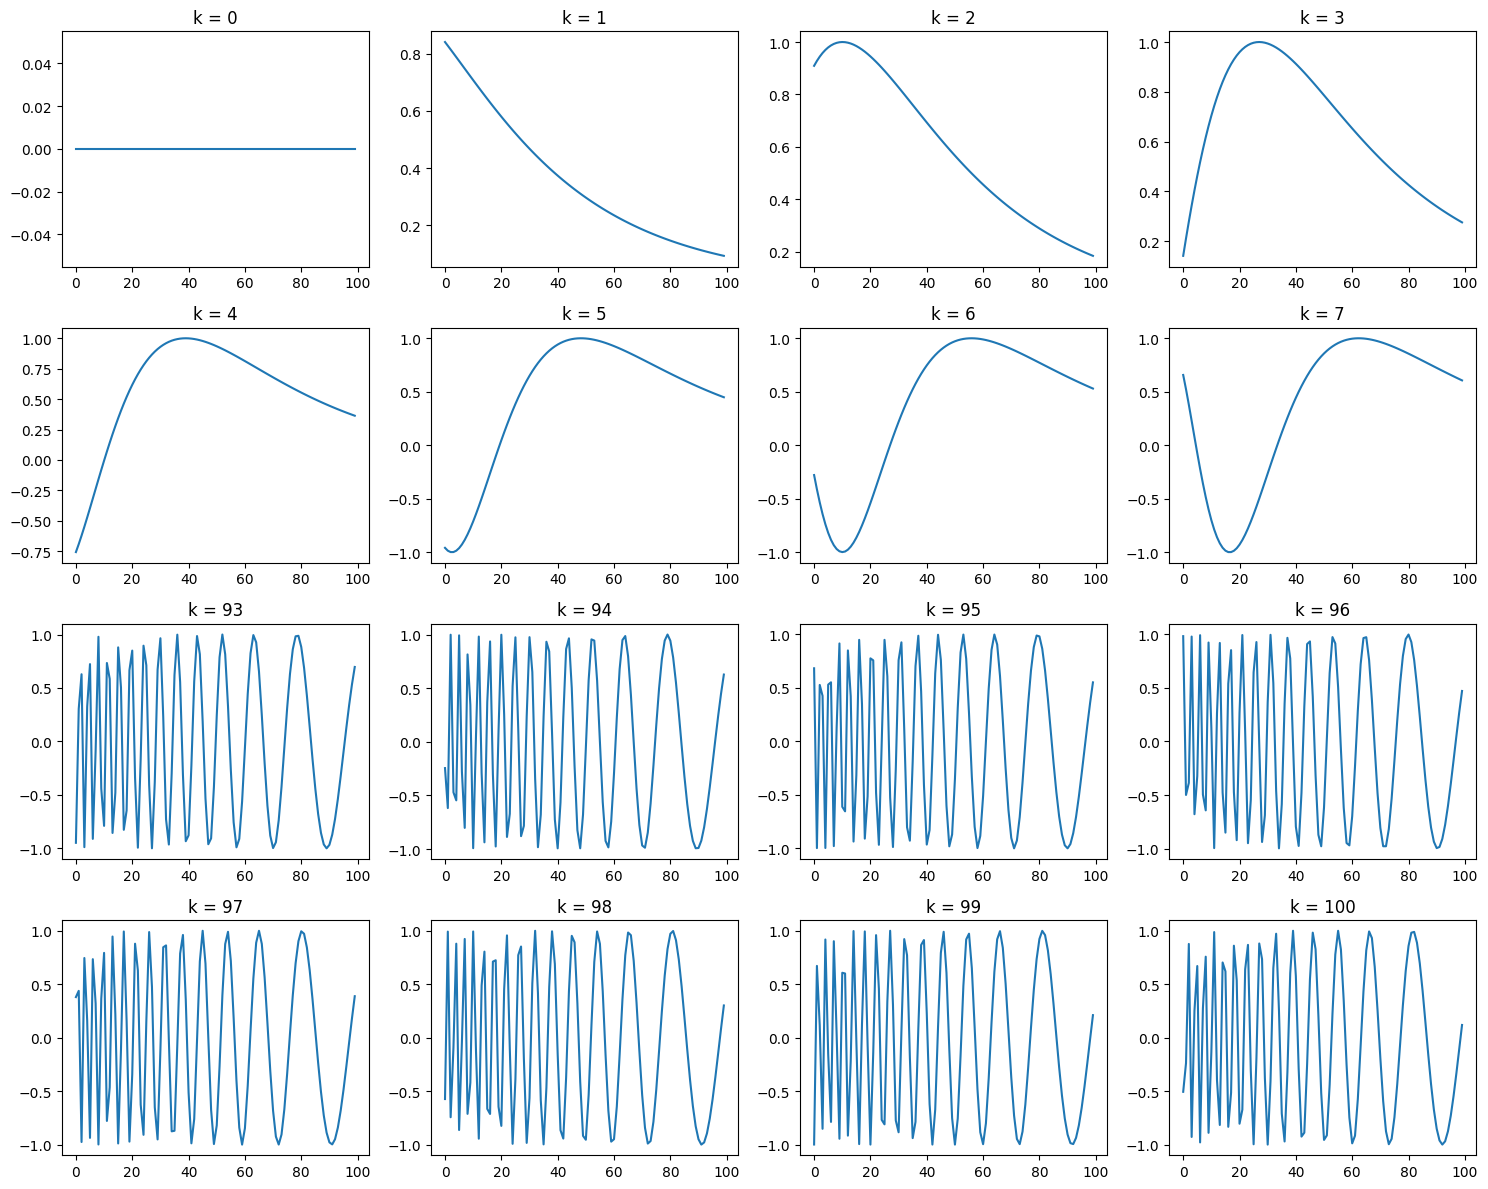

In [3]:
def get_positional_encoding(num_tokens, embed_dim, n=10000):
    """Generates the positional encoding matrix."""
    PE = np.zeros((num_tokens, embed_dim))
    for pos in range(num_tokens):
        for i in range(0, embed_dim, 2):
            PE[pos, i] = np.sin(pos / (n ** ((2 * i)/embed_dim)))
            PE[pos, i + 1] = np.cos(pos / (n ** ((2 * i)/embed_dim)))
    return PE

def plotSinusoid(k, embed_dim=768, n=10000):
    """Plot a single sinusoidal pattern."""
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2 * x / embed_dim)
    y = np.sin(k / denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

# Plot sinusoidal patterns
fig, axs = plt.subplots(4, 4, figsize=(15, 12))

for idx, k in enumerate(list(range(8)) + list(range(93, 101))):
    row = idx // 4
    col = idx % 4
    plt.sca(axs[row, col])
    plotSinusoid(k)

plt.tight_layout()
plt.show()

##### Experiment: Varying the Number of Tokens and the Embedding Dimension

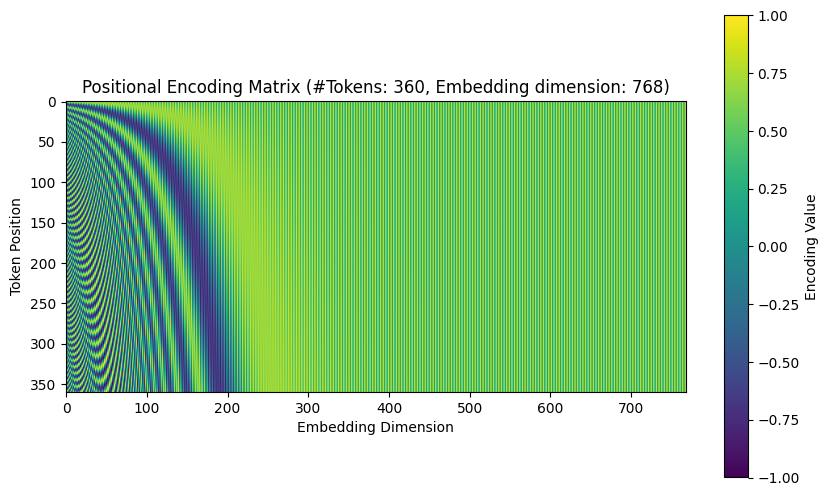

In [4]:
# Experiment with larger sequences and higher dimensions
num_tokens = 360
embed_dim = 768
position_encoding = get_positional_encoding(num_tokens, embed_dim)

# Visualize the new positional encoding matrix
plt.figure(figsize=(10, 6))
plt.imshow(position_encoding)
plt.colorbar(label="Encoding Value")
plt.title(f"Positional Encoding Matrix (#Tokens: {num_tokens}, Embedding dimension: {embed_dim})")
plt.xlabel("Embedding Dimension")
plt.ylabel("Token Position")
plt.show()

##### Integrating Positional Encoding with the Bert model

Bert, a Language Model created by Google, has an embedding dimension of 768.

In [5]:
from transformers import BertModel, BertTokenizer

# Load the BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Tokenize a sentence
sentence = "the chef cooked the meal for his critic"
inputs = tokenizer(sentence, return_tensors="pt")
outputs = model(**inputs)

# Extract the pre-positional embeddings
pre_positional_embeddings = model.embeddings.word_embeddings(inputs['input_ids'])
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

print("Tokens:", tokens)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Tokens: ['[CLS]', 'the', 'chef', 'cooked', 'the', 'meal', 'for', 'his', 'critic', '[SEP]']


Checking out the embedding of 'meal' in "the chef cooked the meal for his critic". This is just the embedding of the token itself before positional encoding is applied.

In [6]:
# Extract the word embedding of a specific token
token_of_interest = 'meal'
token_idx = tokens.index(token_of_interest)
token_emb = pre_positional_embeddings[0, token_idx, :]
print(f"Word embedding of '{token_of_interest}':\n", token_emb)

Word embedding of 'meal':
 tensor([ 5.1795e-03, -1.2388e-02, -1.5891e-02, -5.2657e-02, -3.2865e-02,
        -8.6262e-02,  2.2014e-02,  8.3809e-03, -8.6924e-03, -7.9420e-02,
        -7.9116e-02, -4.3769e-02, -5.6780e-02,  1.4587e-02,  5.1014e-02,
        -3.3937e-02, -6.3669e-02, -4.0915e-02, -5.9377e-02, -5.6749e-03,
        -7.9322e-03, -7.8664e-02, -2.9758e-03, -2.9659e-02, -6.8107e-02,
        -2.5289e-02,  7.0490e-03, -6.1584e-02, -8.2529e-02, -8.0658e-02,
        -1.6931e-02, -3.1954e-02,  6.2628e-02, -5.0055e-02, -4.3979e-03,
        -8.1937e-02, -1.0854e-02, -3.3949e-03,  6.9997e-03, -3.3832e-02,
        -3.5672e-02, -1.5674e-02, -5.6785e-02, -3.2993e-03,  3.1663e-02,
        -3.8142e-02,  2.2566e-03,  2.7261e-02,  1.3750e-02,  8.4355e-03,
        -5.6172e-02, -3.5509e-02, -3.8138e-02,  6.4694e-03, -7.8681e-02,
        -9.0162e-02, -5.3859e-02, -2.1726e-02,  2.1026e-02,  4.5719e-02,
        -2.7206e-02, -3.2550e-02, -4.1310e-02, -1.5415e-02, -8.4796e-02,
        -5.2134e-02,  2.

Now let's get the position vector of 'meal' in "the chef cooked the meal for his critic". Note again that the size of the position vector matches the dimension of the embedding space (768 for the BERT model).

In [7]:
# Extract the positional encoding of a specific token
PE_matrix = get_positional_encoding(num_tokens=len(tokens), embed_dim=768, n=10000)
position_vector = PE_matrix[token_idx, :]
print("Size of position vector:", PE_matrix[token_idx, :].shape)
print(f"Position vector of '{token_of_interest}':\n", position_vector)

Size of position vector: (768,)
Position vector of 'meal':
 [-9.58924275e-01  2.83662185e-01 -9.98573468e-01  5.33950314e-02
 -9.85618397e-01 -1.68986315e-01 -9.27709288e-01 -3.73303464e-01
 -8.33508790e-01 -5.52506196e-01 -7.11848311e-01 -7.02333241e-01
 -5.71127201e-01 -8.20861572e-01 -4.18924208e-01 -9.08021205e-01
 -2.61781576e-01 -9.65127145e-01 -1.05120930e-01 -9.94459446e-01
  4.67465170e-02 -9.98906784e-01  1.90547196e-01 -9.81678036e-01
  3.23935204e-01 -9.46079269e-01  4.45364274e-01 -8.95349464e-01
  5.53955425e-01 -8.32546328e-01  6.49369480e-01 -7.60473062e-01
  7.31690171e-01 -6.81637363e-01  8.01320850e-01 -5.98234816e-01
  8.58895997e-01 -5.12150043e-01  9.05207393e-01 -4.24970087e-01
  9.41144054e-01 -3.38005724e-01  9.67644549e-01 -2.52317314e-01
  9.85660130e-01 -1.68742729e-01  9.96127049e-01 -8.79255505e-02
  9.99946517e-01 -1.03423189e-02  9.97970882e-01  6.36719609e-02
  9.90994778e-01  1.33900522e-01  9.79750154e-01  2.00223965e-01
  9.64904275e-01  2.62601866e-

From here, the part of the input given to the transformer model corresponding to 'meal in "the chef cooked the meal for his critic" is given by adding its position vector to its embedding vector. The addition of this position vector is what introduces a notion of where 'meal' appears in "the chef cooked the meal for his critic" to the model.

In [8]:
print(f"Part of the input given to the transformer model corresponding to 'meal':\n", token_emb + torch.tensor(position_vector))

Part of the input given to the transformer model corresponding to 'meal':
 tensor([-9.5374e-01,  2.7127e-01, -1.0145e+00,  7.3793e-04, -1.0185e+00,
        -2.5525e-01, -9.0570e-01, -3.6492e-01, -8.4220e-01, -6.3193e-01,
        -7.9096e-01, -7.4610e-01, -6.2791e-01, -8.0627e-01, -3.6791e-01,
        -9.4196e-01, -3.2545e-01, -1.0060e+00, -1.6450e-01, -1.0001e+00,
         3.8814e-02, -1.0776e+00,  1.8757e-01, -1.0113e+00,  2.5583e-01,
        -9.7137e-01,  4.5241e-01, -9.5693e-01,  4.7143e-01, -9.1320e-01,
         6.3244e-01, -7.9243e-01,  7.9432e-01, -7.3169e-01,  7.9692e-01,
        -6.8017e-01,  8.4804e-01, -5.1554e-01,  9.1221e-01, -4.5880e-01,
         9.0547e-01, -3.5368e-01,  9.1086e-01, -2.5562e-01,  1.0173e+00,
        -2.0689e-01,  9.9838e-01, -6.0664e-02,  1.0137e+00, -1.9068e-03,
         9.4180e-01,  2.8163e-02,  9.5286e-01,  1.4037e-01,  9.0107e-01,
         1.1006e-01,  9.1105e-01,  2.4088e-01,  9.6809e-01,  3.6678e-01,
         8.9955e-01,  3.4311e-01,  8.6317e-01,  4

 #### Text Sentiment Analysis

In [9]:
from transformers import pipeline

text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english", framework="pt")
print(pd.DataFrame(classifier(text)))

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

      label     score
0  NEGATIVE  0.901546
